In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime 
from scipy.stats import linregress

In [12]:
# Load the cvs cities file to a DataFrame

cities = "Resources/cities.csv"
weather_cities = pd.read_csv(cities)

In [13]:
weather_cities.head(10)

City_ID          City  Cloudiness Country        Date  Humidity    Lat  \
0        0  jacareacanga           0      BR  1528902000        62  -6.22   
1        1    kaitangata         100      NZ  1528905304        94 -46.28   
2        2      goulburn          20      AU  1528905078        91 -34.75   
3        3          lata          76      IN  1528905305        89  30.78   
4        4    chokurdakh           0      RU  1528905306        88  70.62   
5        5      martyush          92      RU  1528905306        94  56.40   
6        6        hobart          20      AU  1528902000        87 -42.88   
7        7   broken hill           0      AU  1528905311        88 -31.97   
8        8     harnosand           0      SE  1528903200        44  62.63   
9        9     tuatapere           0      NZ  1528905312       100 -46.13   

      Lng  Max Temp  Wind Speed  
0  -57.76     89.60        6.93  
1  169.85     42.61        5.64  
2  149.72     44.32       10.11  
3   78.62     59.89        0.94  
4  147.90     32.17        2.95  
5   61.89     55.03        9.33  
6  147.33     44.60        8.05  
7  141.45     44.50        7.31  
8   17.94     60.80       13.87  
9  167.69     38.92        3.40

In [14]:
# convert date
for date_ in weather_cities['Date']:
    weather_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
weather_cities.set_index('City_ID')

City  Cloudiness Country        Date  Humidity    Lat  \
City_ID                                                                  
0        jacareacanga           0      BR  06/13/2018        62  -6.22   
1          kaitangata         100      NZ  06/13/2018        94 -46.28   
2            goulburn          20      AU  06/13/2018        91 -34.75   
3                lata          76      IN  06/13/2018        89  30.78   
4          chokurdakh           0      RU  06/13/2018        88  70.62   
...               ...         ...     ...         ...       ...    ...   
542            scalea          36      IT  06/13/2018       100  39.82   
543        san andres          68      PH  06/13/2018       100  13.32   
544            muisne          92      EC  06/13/2018        84   0.61   
545               ati          20      TD  06/13/2018        25  13.21   
546          san luis           0      AR  06/13/2018        53 -33.30   

            Lng  Max Temp  Wind Speed  
City_ID                                
0        -57.76     89.60        6.93  
1        169.85     42.61        5.64  
2        149.72     44.32       10.11  
3         78.62     59.89        0.94  
4        147.90     32.17        2.95  
...         ...       ...         ...  
542       15.79     70.06        5.30  
543      122.68     83.47       22.64  
544      -80.02     76.90        4.63  
545       18.34    104.53        4.97  
546      -66.34     42.43        2.62  

[547 rows x 9 columns]

In [15]:
#render dataframe as html
# html = weather_cities.to_html()

#write html to file
text_file = open("weather_data.html", "w")
text_file.write(weather_cities.to_html(index = False))
text_file.close()

In [ ]:
# for additional analysis

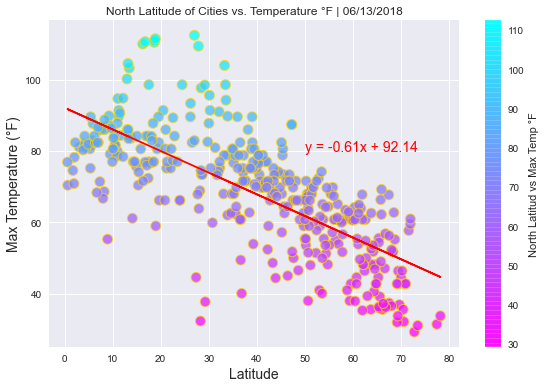

the intercept :92.136
correlation:-0.729
Lat linear regression model :y = -0.61x + 92.14
 I observe that both variables have a very high inverse (negative) correlation based on the value: -0.729, that is -72.9%, which indicates that are inversely proportional, as long as the Latitude decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.


In [22]:
Northern_city_data = weather_cities[(weather_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Max Temp']
ratio_Northern = Northern_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,80),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Max Temp °F')
plt.savefig("Resources/assets/images/Fig5.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"===============================================")
print(f" I observe that both variables have a very high inverse (negative) correlation \
based on the value: {correlation_North}, that is {round(correlation_North*100,2)}%, which \
indicates that are inversely proportional, as long as the Latitude \
decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.")

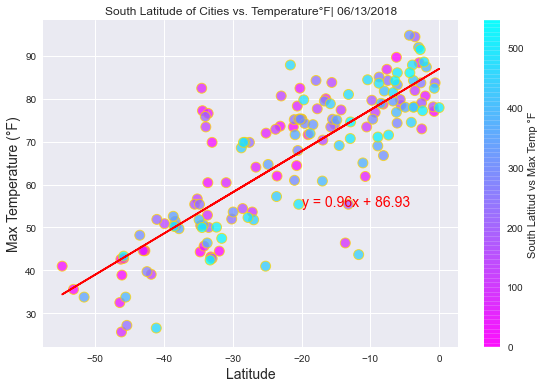

the intercept :86.934
correlation:0.83
Lat linear regression model :y = 0.96x + 86.93
There is a very high correlation based on the value 0.83, that is: 83.0%, which indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), the Temeprature °F also increases, in the same proportion.


In [23]:
Southern_city_data = weather_cities[(weather_cities['Lat'] < 0)]
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Max Temp']
ratio_Southern = Southern_city_data['Max Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,55),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Temperature°F| {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Max Temp °F')
plt.savefig("Resources/assets/images/Fig6.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a very high correlation based on the value {correlation_South}, that is: {round(correlation_South*100,2)}%, which \
indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), \
the Temeprature °F also increases, in the same proportion.")